## Andre Ofsoski 1314669
## Reece Breebaart 1314828

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['housing.csv']


In [2]:
# store data in variable
df = pd.read_csv('../input/housing.csv')
# fill blank entries
df = df.fillna(0)

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# change categorical coloumns to numerical values
ocean_proximity= {"NEAR BAY":1, "<1H OCEAN":2, "INLAND":3, "NEAR OCEAN":4, "ISLAND":5}
df.ocean_proximity=[ocean_proximity[item] for item in df.ocean_proximity]
# split data into train and test
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:9]
y=df.iloc[:,9]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1314669)
print (x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


In [4]:
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
def run_reg( regressor, x_train, x_test, y_train, y_test):
    regressor.fit(x_train,y_train)
    y_train_predict = regressor.predict(x_test)
    y_train_predict[y_train_predict < 15000]=15000
    y_train_predict[y_train_predict > 500000]=500000
    mae = mean_absolute_error(y_test, y_train_predict)
    plt.scatter(y_test,y_train_predict)
    plt.title(mae)
    plt.show()
    plt.plot(regressor.coef_)
    plt.show()
    return mae

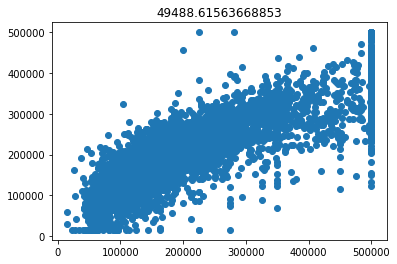

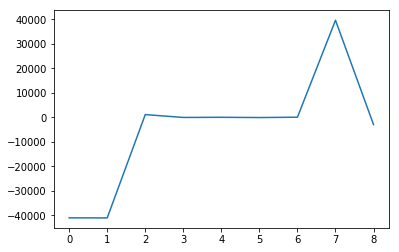

49488.61563668853

In [5]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.1,solver="cholesky")
run_reg(ridge_reg,x_train,x_test,y_train,y_test)

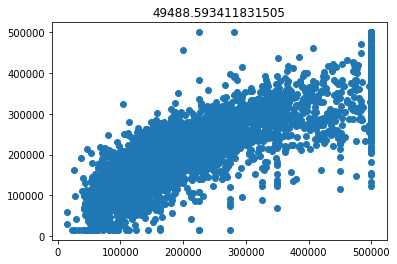

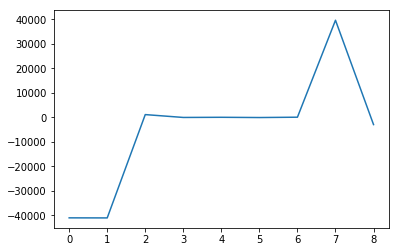

49488.593411831505

In [6]:
from sklearn.linear_model import Ridge 
ridge_reg2 = Ridge(alpha=0.001,solver="cholesky")
run_reg(ridge_reg2,x_train,x_test,y_train,y_test)

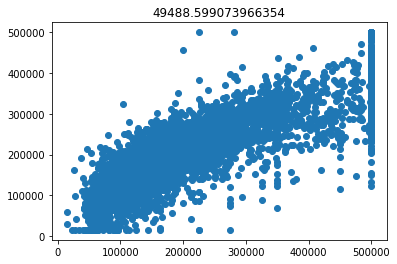

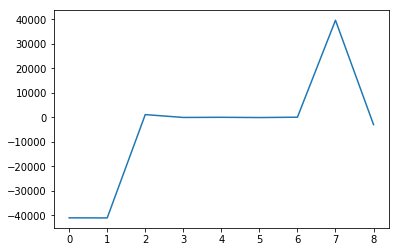

49488.599073966354

In [7]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
run_reg(lasso_reg,x_train,x_test,y_train,y_test)

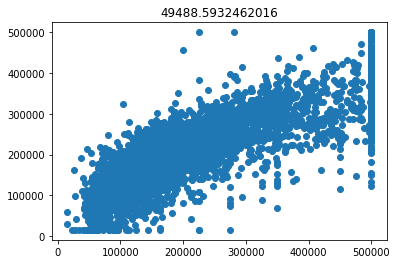

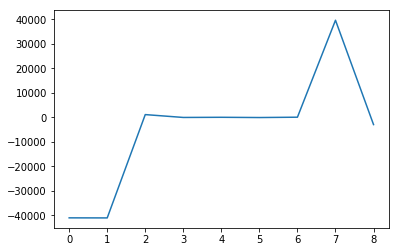

49488.5932462016

In [8]:
from sklearn.linear_model import Lasso 
lasso_reg2 = Lasso(alpha=0.001)
run_reg(lasso_reg2,x_train,x_test,y_train,y_test)

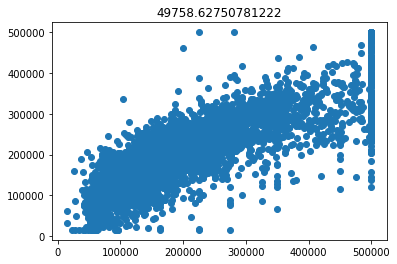

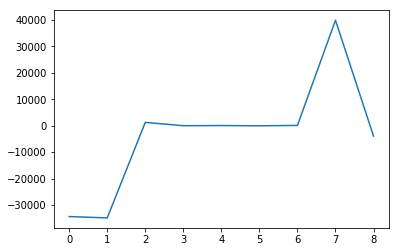

49758.62750781222

In [9]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1)
run_reg(elastic_net,x_train,x_test,y_train,y_test)

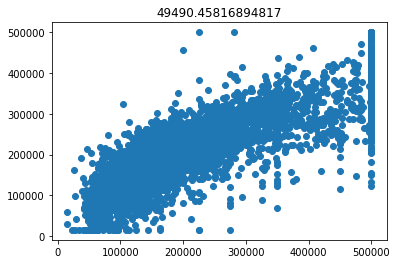

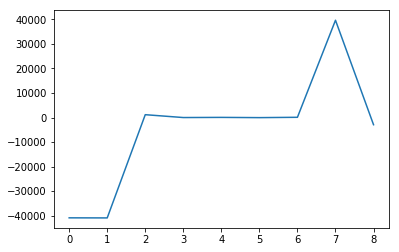

49490.45816894817

In [10]:
from sklearn.linear_model import ElasticNet
elastic_net2 = ElasticNet(alpha=0.001)
run_reg(elastic_net2,x_train,x_test,y_train,y_test)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly3=poly.fit_transform(x_train)
X_test_poly3=poly.fit_transform(x_test)

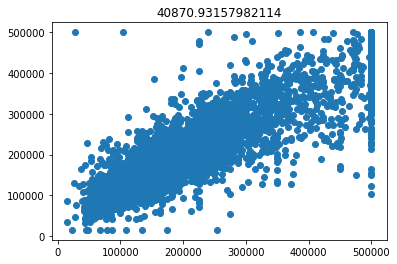

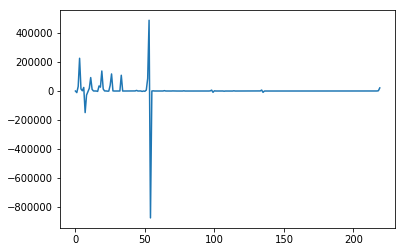

40870.93157982114

In [12]:
ridge_reg3 = Ridge(alpha=0.1,solver="cholesky")
run_reg(ridge_reg3,X_train_poly3,X_test_poly3,y_train,y_test)

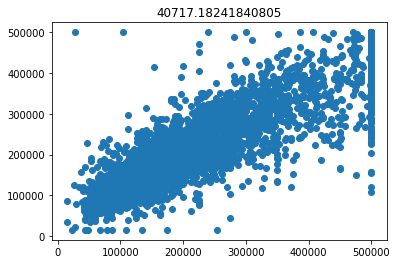

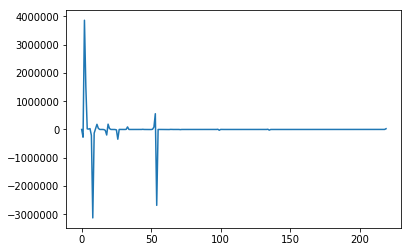

40717.18241840805

In [13]:
ridge_reg4 = Ridge(alpha=0.001,solver="cholesky")
run_reg(ridge_reg4,X_train_poly3,X_test_poly3,y_train,y_test)

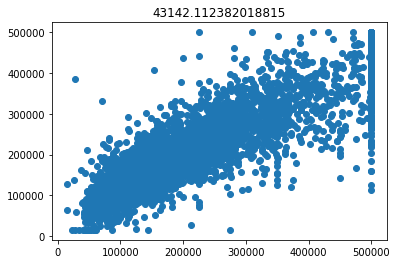

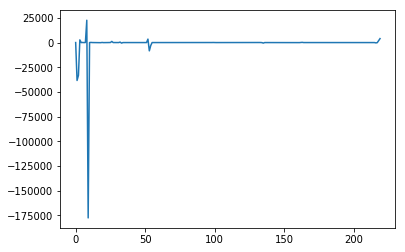

43142.112382018815

In [14]:
lasso_reg3 = Lasso(alpha=0.1)
run_reg(lasso_reg3,X_train_poly3,X_test_poly3,y_train,y_test)

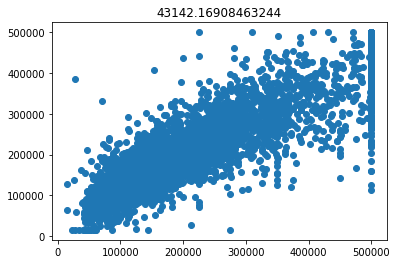

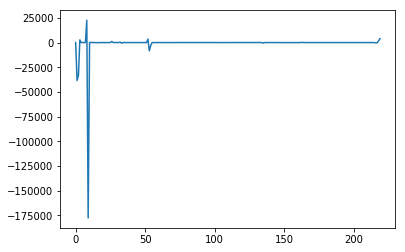

43142.16908463244

In [15]:
lasso_reg4 = Lasso(alpha=0.001)
run_reg(lasso_reg4,X_train_poly3,X_test_poly3,y_train,y_test)

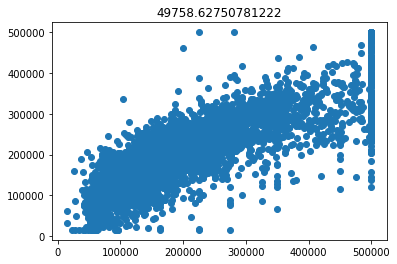

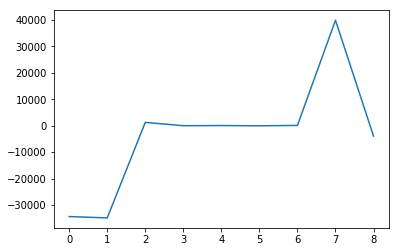

49758.62750781222

In [16]:
elastic_net3 = ElasticNet(alpha=0.1)
run_reg(elastic_net3,x_train,x_test,y_train,y_test)

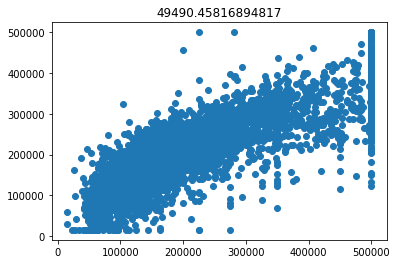

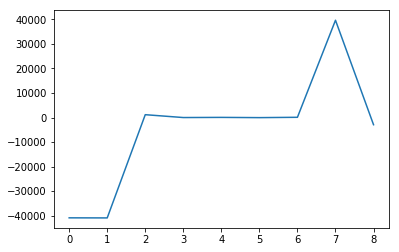

49490.45816894817

In [17]:
elastic_net4 = ElasticNet(alpha=0.001)
run_reg(elastic_net4,x_train,x_test,y_train,y_test)

# Comments
The Ridge regressor using the X_train_poly3 and X_test_poly3 and alpha = 0.001 returned a MAE score of 40717.18241840805 which was the lowest out of all 12 results and therefore performed the best.